# Neuroanalysis with Python

Although you may not believe it, you have now learned enough NumPy and Matplotlib to **tackle almost any problem in neuroanalysis!!** But what exactly do I mean with neuroanalysis? In this session and the next, we'll take a look at some of the common kinds of problems and anslysis you will encounter when working with neural data.

First thing first, let's go ahead and import essential packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Working with neuronal recordings

If you perform electrophysiology recordings on a neuron or perhaps a population of neurons, you will be working with a recording of a **neuron's electrical potential**. This might be made available to you in varioud **data formats**. When you want to work with them, usually the very first question is: **how do I load the data?**

## Loading data files into Python

So far, when you worked with NumPy arrays, most of the data was generated by you, the programmer. With use of functions like `input` we also saw how you could prompt the **user** of your code to enter some data into your code, usually by entering data one at a time.

However, in scientific computing, you would very likely want to work with **data that has been generated elsewhere**. The source of data can be an eletrophysiology system, microscopy imaging system, eye tracker, or even surveys filled out by human subjects. In modern day computing, these data are then typically stored and transported as **files** with some data format. 

Hence, if you want to get data, you will have to somehow load data from files into Python. There are many ways to do this, and we will take a look at few options you have.

### Loading simple textual files

One of the simplest file format is **plain-text** files. As the name suggests, these are files that only contain textual characters inside. For an example, let's take a look at `recordings.dat` file.

Here we are going to use Jupyter's `%load` magic to open up the content of the file.

In [4]:
# %load data/mouse.dat
m122
m104
m48
m690
m329

Let's try to **load the content of the file**. To do so, we are going to use the `open` function in Python to `open` a file!

In [5]:
f = open('data/mouse.dat')

In [6]:
f

<_io.TextIOWrapper name='data/mouse.dat' mode='r' encoding='cp1252'>

This returns a **file handle** - a special kind of object that **represents a file**.

In [7]:
# read the entire content
content = f.read()

In [8]:
content

'm122\nm104\nm48\nm690\nm329'

In [9]:
print(content)

m122
m104
m48
m690
m329


In [10]:
# run read for the second time
content_again = f.read()

In [11]:
content_again

''

When you are done using a file, you should always **close** the file:

In [12]:
f.close() # closes the file

In [13]:
f.read() # operation on a closed file triggers an error

ValueError: I/O operation on closed file.

#### On a tangent: Escape sequences in a string

Sometimes you would want to express **special key** results such as the `Enter` key resulting in a **line break** and `Tab` key resulting in an indentation. In Python (and in fact almost every other languages), you express these with **escape sequences**.

In [14]:
# a string with line break `\n`
message = 'Hi! This message\nshould appear over\nthree lines!'

In [15]:
message

'Hi! This message\nshould appear over\nthree lines!'

Escape sequences like `\n` will not be treated too specially if you just look into the content of a string. The effect really kicks in when you **print** the string.

In [16]:
print(message)

Hi! This message
should appear over
three lines!


In [17]:
print('This\tshould\tappear\ttab\tshifted\nOccuring\tover\ttwo\tlines')

This	should	appear	tab	shifted
Occuring	over	two	lines


Interesting escape sequence is **a single character** as far as Python is concerned:

In [18]:
var1 = 'abc'
print(var1)
print(len(var1))

abc
3


In [19]:
var2 = 'a\nc'
print(var2)
print(len(var1))

a
c
3


There are [many other escape sequences](https://docs.python.org/3/reference/lexical_analysis.html#string-and-bytes-literals), the newline character `\n` and tab character `\t` are by far the two most common escape sequences you would encounter and thus would want to know!

#### Escaping characters with special meaning

Escape sequence can be useful if you want to use `'` and `"` inside a string literal.

While you could use `'` and `"` inside a string literal as long as you use the other quote kind:

In [20]:
print('This method "works" well')
print("But limits your 'choice'")

This method "works" well
But limits your 'choice'


In [21]:
print('Now I can put "double quotes" and \'single quotes\' in a same string!')

Now I can put "double quotes" and 'single quotes' in a same string!


### Reading file content line by line

Running `read` method on the file handle gives you the entire file content in one string. Although this is a start, this may not be the most convenient way to work with a file.

Thankfully, file handle is an **iterable** object - meaning you can iterate through the file content!

In [22]:
f = open('data/mouse.dat')

for line in f:
    print(line)
    
f.close()

m122

m104

m48

m690

m329


Notice that there is an extra line between each because there is `\n` character at the end of each line that is read.

We can remove any leading and trailing spaces and new line characters -- collectively referred to as **white space characters** -- by using `strip` method on the string

In [23]:
f = open('data/mouse.dat')

for line in f:
    print(line.strip())  # strips leading/trailing whiltespace characters
    
f.close()

m122
m104
m48
m690
m329


We can of course store the line content into a list:

In [24]:
f = open('data/mouse.dat')
mouse_list = []
for line in f:
    mouse_list.append(line.strip())  # strips leading/trailing whiltespace characters
    
f.close()
    
mouse_list

['m122', 'm104', 'm48', 'm690', 'm329']

Actually, it turns out that file object has a method called `readlines` that **almost** does what we want!

In [25]:
f.readlines?

Signature: f.readlines(hint=-1, /)
Docstring:
Return a list of lines from the stream.

hint can be specified to control the number of lines read: no more
lines will be read if the total size (in bytes/characters) of all
lines so far exceeds hint.
Type:      builtin_function_or_method


In [26]:
f = open('data/mouse.dat')
mouse_list = f.readlines()

mouse_list

['m122\n', 'm104\n', 'm48\n', 'm690\n', 'm329']

Only issue is that each data entry has the trailing `\n` on it. Although you can do a full fledged for loop, this is where **list comprehension** can be very handy.

In [27]:
clean_mouse_list = [m.strip() for m in mouse_list]

In [28]:
clean_mouse_list

['m122', 'm104', 'm48', 'm690', 'm329']

## Loading comma separated values

Another common file format you might encounter is a textual file where **distinct values are separated by comma**. These files are typically referred to as **comma-separated values** and have file extension **csv**.

In [29]:
# %load data/position.csv
0.65589,0.57823,0.33661,0.16374,0.12180,-0.08730,-0.32791,-0.02155,-0.56670,-0.70968,-0.83033,-0.94229,-0.62620,-0.83811,-0.84556,-1.00000,-0.99296,-0.99012,-0.87674,-0.86348,-0.92978,-0.93794,-0.74789,-0.54437,-0.69714,-0.57095,-0.47770,-0.05630,-0.05112,0.02798,0.15682,0.56518,0.42280,0.54062,0.73925,0.46023,0.93578,0.83758,0.92696,0.83959,0.98542,0.93230,0.93887,0.98559,0.91488,0.99161,0.66137,0.93301,0.55899,0.32709,0.71629,0.38173,0.28290,0.27180,-0.27958,-0.36215,-0.28922,-0.49119,-0.68146,-0.32334,-0.60336,-0.90789,-0.89853,-0.99541,-0.96631,-0.99483,-0.99976,-0.99998,-0.95507,-0.84919,-0.83438,-0.91877,-0.85928,-0.65672,-0.54651,-0.53178,-0.40231,-0.01891,-0.15738,-0.10022,0.26732,0.25906,0.66773,0.56343,0.61935,0.80379,0.87985,0.75094,0.84290,0.98704,0.97718,0.98602,0.88545,0.99304,0.84986,0.88180,0.74419,0.71700,0.58715,0.54574

In [30]:
f = open('data/position.csv')
data = f.read()
f.close()

data

'0.65589,0.57823,0.33661,0.16374,0.12180,-0.08730,-0.32791,-0.02155,-0.56670,-0.70968,-0.83033,-0.94229,-0.62620,-0.83811,-0.84556,-1.00000,-0.99296,-0.99012,-0.87674,-0.86348,-0.92978,-0.93794,-0.74789,-0.54437,-0.69714,-0.57095,-0.47770,-0.05630,-0.05112,0.02798,0.15682,0.56518,0.42280,0.54062,0.73925,0.46023,0.93578,0.83758,0.92696,0.83959,0.98542,0.93230,0.93887,0.98559,0.91488,0.99161,0.66137,0.93301,0.55899,0.32709,0.71629,0.38173,0.28290,0.27180,-0.27958,-0.36215,-0.28922,-0.49119,-0.68146,-0.32334,-0.60336,-0.90789,-0.89853,-0.99541,-0.96631,-0.99483,-0.99976,-0.99998,-0.95507,-0.84919,-0.83438,-0.91877,-0.85928,-0.65672,-0.54651,-0.53178,-0.40231,-0.01891,-0.15738,-0.10022,0.26732,0.25906,0.66773,0.56343,0.61935,0.80379,0.87985,0.75094,0.84290,0.98704,0.97718,0.98602,0.88545,0.99304,0.84986,0.88180,0.74419,0.71700,0.58715,0.54574'

So problem is that now what you have is a big string of values separated by comma. You would first want to **split them at comma**. Well, that's what the `split` method is for!

In [31]:
split_data = data.split(',')  # split at comma

split_data

['0.65589',
 '0.57823',
 '0.33661',
 '0.16374',
 '0.12180',
 '-0.08730',
 '-0.32791',
 '-0.02155',
 '-0.56670',
 '-0.70968',
 '-0.83033',
 '-0.94229',
 '-0.62620',
 '-0.83811',
 '-0.84556',
 '-1.00000',
 '-0.99296',
 '-0.99012',
 '-0.87674',
 '-0.86348',
 '-0.92978',
 '-0.93794',
 '-0.74789',
 '-0.54437',
 '-0.69714',
 '-0.57095',
 '-0.47770',
 '-0.05630',
 '-0.05112',
 '0.02798',
 '0.15682',
 '0.56518',
 '0.42280',
 '0.54062',
 '0.73925',
 '0.46023',
 '0.93578',
 '0.83758',
 '0.92696',
 '0.83959',
 '0.98542',
 '0.93230',
 '0.93887',
 '0.98559',
 '0.91488',
 '0.99161',
 '0.66137',
 '0.93301',
 '0.55899',
 '0.32709',
 '0.71629',
 '0.38173',
 '0.28290',
 '0.27180',
 '-0.27958',
 '-0.36215',
 '-0.28922',
 '-0.49119',
 '-0.68146',
 '-0.32334',
 '-0.60336',
 '-0.90789',
 '-0.89853',
 '-0.99541',
 '-0.96631',
 '-0.99483',
 '-0.99976',
 '-0.99998',
 '-0.95507',
 '-0.84919',
 '-0.83438',
 '-0.91877',
 '-0.85928',
 '-0.65672',
 '-0.54651',
 '-0.53178',
 '-0.40231',
 '-0.01891',
 '-0.15738',
 '-

Now the data is still in strings, so we want to convert each of these values into `float`. Let's use list comprehension again:

In [32]:
# converts every element of split_data into float
float_data = [float(v) for v in split_data]

In [33]:
float_data

[0.65589,
 0.57823,
 0.33661,
 0.16374,
 0.1218,
 -0.0873,
 -0.32791,
 -0.02155,
 -0.5667,
 -0.70968,
 -0.83033,
 -0.94229,
 -0.6262,
 -0.83811,
 -0.84556,
 -1.0,
 -0.99296,
 -0.99012,
 -0.87674,
 -0.86348,
 -0.92978,
 -0.93794,
 -0.74789,
 -0.54437,
 -0.69714,
 -0.57095,
 -0.4777,
 -0.0563,
 -0.05112,
 0.02798,
 0.15682,
 0.56518,
 0.4228,
 0.54062,
 0.73925,
 0.46023,
 0.93578,
 0.83758,
 0.92696,
 0.83959,
 0.98542,
 0.9323,
 0.93887,
 0.98559,
 0.91488,
 0.99161,
 0.66137,
 0.93301,
 0.55899,
 0.32709,
 0.71629,
 0.38173,
 0.2829,
 0.2718,
 -0.27958,
 -0.36215,
 -0.28922,
 -0.49119,
 -0.68146,
 -0.32334,
 -0.60336,
 -0.90789,
 -0.89853,
 -0.99541,
 -0.96631,
 -0.99483,
 -0.99976,
 -0.99998,
 -0.95507,
 -0.84919,
 -0.83438,
 -0.91877,
 -0.85928,
 -0.65672,
 -0.54651,
 -0.53178,
 -0.40231,
 -0.01891,
 -0.15738,
 -0.10022,
 0.26732,
 0.25906,
 0.66773,
 0.56343,
 0.61935,
 0.80379,
 0.87985,
 0.75094,
 0.8429,
 0.98704,
 0.97718,
 0.98602,
 0.88545,
 0.99304,
 0.84986,
 0.8818,
 0.744

We can quickly plot this data!

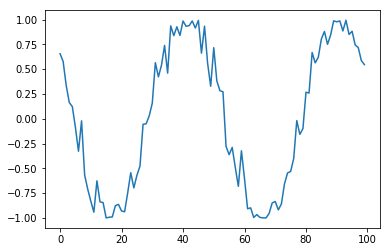

In [34]:
plt.plot(float_data)

Looks like the subject was moving back and forth!

#### On the tangent: plotting data with `plot`

You may have been surprised to see that Matplotlib's `plot` accepts a plain list instead of a NumPy array and that it was okay with just a single list. Somehow, it didn't need x values!

`plot` actually happily accepts any **iterable** data as its x or y value. So you can use `plot` with plain lists!

Also, if you don't supply two lists (for x and y) and just give one list, then the list is automatically considered to be the y-values. `plot` will silently prepare it's own x values that counts up the data points from 0.

## Letting NumPy do the hard work

At this point, you may be surprised how much work is involved in just loading such simple files! Indeed, **figuring out how to load the data could be the hardest part of your project** depending on the project and how data is stored and passed around!

Fortunately, packages like NumPy comes with functions to make loading some files less painful.

### Loading CSV files with NumPy

NumPy comes with `loadtxt` function that can work with a large variety of file formats.

In [35]:
np.loadtxt?

Signature: np.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes')
Docstring:
Load data from a text file.

Each row in the text file must have the same number of values.

Parameters
----------
fname : file, str, or pathlib.Path
    File, filename, or generator to read.  If the filename extension is
    ``.gz`` or ``.bz2``, the file is first decompressed. Note that
    generators should return byte strings for Python 3k.
dtype : data-type, optional
    Data-type of the resulting array; default: float.  If this is a
    structured data-type, the resulting array will be 1-dimensional, and
    each row will be interpreted as an element of the array.  In this
    case, the number of columns used must match the number of fields in
    the data-type.
comments : str or sequence of str, optional
    The characters or list of characters used to indicate the start of a
    comment. For backwards com

In [36]:
np.loadtxt('data/position.csv', delimiter=',')

array([ 0.65589,  0.57823,  0.33661,  0.16374,  0.1218 , -0.0873 ,
       -0.32791, -0.02155, -0.5667 , -0.70968, -0.83033, -0.94229,
       -0.6262 , -0.83811, -0.84556, -1.     , -0.99296, -0.99012,
       -0.87674, -0.86348, -0.92978, -0.93794, -0.74789, -0.54437,
       -0.69714, -0.57095, -0.4777 , -0.0563 , -0.05112,  0.02798,
        0.15682,  0.56518,  0.4228 ,  0.54062,  0.73925,  0.46023,
        0.93578,  0.83758,  0.92696,  0.83959,  0.98542,  0.9323 ,
        0.93887,  0.98559,  0.91488,  0.99161,  0.66137,  0.93301,
        0.55899,  0.32709,  0.71629,  0.38173,  0.2829 ,  0.2718 ,
       -0.27958, -0.36215, -0.28922, -0.49119, -0.68146, -0.32334,
       -0.60336, -0.90789, -0.89853, -0.99541, -0.96631, -0.99483,
       -0.99976, -0.99998, -0.95507, -0.84919, -0.83438, -0.91877,
       -0.85928, -0.65672, -0.54651, -0.53178, -0.40231, -0.01891,
       -0.15738, -0.10022,  0.26732,  0.25906,  0.66773,  0.56343,
        0.61935,  0.80379,  0.87985,  0.75094,  0.8429 ,  0.98

It *could* deal with more complex file content.

In [37]:
np.loadtxt('data/block_data.csv', skiprows=1, delimiter=',')

array([[ 0.   ,  3.   ,  0.123,  0.128,  0.105,  0.131],
       [ 1.   ,  9.   ,  0.132,  0.11 ,  0.08 ,  0.03 ],
       [ 4.   , 10.   , -0.53 ,  0.25 ,  0.04 ,  0.83 ],
       [ 3.   , 21.   ,  1.23 ,  1.38 ,  1.29 ,  1.26 ]])

However, NumPy `loadtxt` starts to show limitation when the multiple **data types** are found in a single file.

In [38]:
np.loadtxt('data/named_data.csv', skiprows=1, delimiter=',')

ValueError: could not convert string to float: 'Edgar'

When loading CSV or even excel spread sheet data, you are better off using more **table oriented packages** such as `pandas`. Just a quick demo:

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('data/named_data.csv')
df

,name,start position,end position,block1,block2,block3,block4
0,Edgar,0,3,0.123,0.128,0.105,0.131
1,John,1,9,0.132,0.110,0.080,0.030
2,Moku,4,10,-0.530,0.250,0.040,0.830
3,Chabo,3,21,1.230,1.380,1.290,1.260


In [41]:
df['name']

0    Edgar
1     John
2     Moku
3    Chabo
Name: name, dtype: object

In [42]:
df[1:3]

,name,start position,end position,block1,block2,block3,block4
1,John,1,9,0.132,0.11,0.08,0.03
2,Moku,4,10,-0.530,0.25,0.04,0.83


## Working with NumPy specific file format

Although you could use formats like **line separated values** and **commad separated values** to store 1-D and 2-D data, saving and loading higher dimensional data can be a challenge. Fortunately, NumPy comes with its own data format that you can use to store and load NumPy arrays conveniently.

### Saving in NumPy file format

Let's create a 4d array filled with random numbers:

In [43]:
data = np.random.randn(10, 5, 3, 4)

We can **save this data into a NumPy data file** using `np.save` function:

In [44]:
np.save?

Signature: np.save(file, arr, allow_pickle=True, fix_imports=True)
Docstring:
Save an array to a binary file in NumPy ``.npy`` format.

Parameters
----------
file : file, str, or pathlib.Path
    File or filename to which the data is saved.  If file is a file-object,
    then the filename is unchanged.  If file is a string or Path, a ``.npy``
    extension will be appended to the file name if it does not already
    have one.
arr : array_like
    Array data to be saved.
allow_pickle : bool, optional
    Allow saving object arrays using Python pickles. Reasons for disallowing
    pickles include security (loading pickled data can execute arbitrary
    code) and portability (pickled objects may not be loadable on different
    Python installations, for example if the stored objects require libraries
    that are not available, and not all pickled data is compatible between
    Python 2 and Python 3).
    Default: True
fix_imports : bool, optional
    Only useful in forcing objects in obj

In [45]:
np.save('data/random4d', data) # by default puts `.npy` extension

And that's it! You have just saved your random array into a file called `data/random4d.npy`!

### Loading in NumPy file format

Of course, saving is just half of the story - we must be able to load it! As you might have guessed, you would use `np.load` function to load data saved in NPY file.

In [48]:
loaded_data = np.load('data/random4d.npy')

In [49]:
loaded_data

array([[[[-1.42159286,  2.1248606 , -0.15878661,  0.14178231],
         [-1.58888462,  0.09891619,  1.17990132,  0.21084317],
         [ 1.05008465, -0.99771648, -0.07071537,  0.77794525]],

        [[ 0.83701013, -1.72589283,  0.08396399, -0.25663497],
         [ 0.26865141, -0.0972457 ,  1.39707107,  1.24443798],
         [-0.01309542,  0.09533049, -2.0144062 , -0.72078592]],

        [[ 0.05074766,  0.71468627,  0.6808167 ,  0.32076405],
         [-1.66810502, -1.37603429,  0.13731581, -0.41412383],
         [ 1.64007272, -0.84401601, -0.04840279,  0.08035289]],

        [[-2.06124956,  0.08508943, -0.02665758, -0.52009464],
         [ 0.33430691,  1.45185228,  0.39652144,  1.75865021],
         [-0.91564408,  0.37170242,  0.73660473,  1.01206662]],

        [[ 0.55443661,  0.58352105,  0.55057761, -1.09672267],
         [ 1.64642869,  1.12707319, -0.14131199, -0.0832806 ],
         [-0.1772791 , -0.40919601,  0.26750552, -0.98602346]]],


       [[[-0.37371671, -0.77545726,  2.4783

Let's use `np.all` to verify that our `loaded_data` is the same as the saved `data`.

In [50]:
np.all(data == loaded_data)

False

np.all checks every value of a boolean array and returns True if every element is True

But notice that these two are **separate copies**: i.e. changing one does **not** change the other.

In [51]:
data[:] = 0 # fill the entire data with 0

In [52]:
loaded_data # loaded copy is unaffected!

array([[[[-1.42159286,  2.1248606 , -0.15878661,  0.14178231],
         [-1.58888462,  0.09891619,  1.17990132,  0.21084317],
         [ 1.05008465, -0.99771648, -0.07071537,  0.77794525]],

        [[ 0.83701013, -1.72589283,  0.08396399, -0.25663497],
         [ 0.26865141, -0.0972457 ,  1.39707107,  1.24443798],
         [-0.01309542,  0.09533049, -2.0144062 , -0.72078592]],

        [[ 0.05074766,  0.71468627,  0.6808167 ,  0.32076405],
         [-1.66810502, -1.37603429,  0.13731581, -0.41412383],
         [ 1.64007272, -0.84401601, -0.04840279,  0.08035289]],

        [[-2.06124956,  0.08508943, -0.02665758, -0.52009464],
         [ 0.33430691,  1.45185228,  0.39652144,  1.75865021],
         [-0.91564408,  0.37170242,  0.73660473,  1.01206662]],

        [[ 0.55443661,  0.58352105,  0.55057761, -1.09672267],
         [ 1.64642869,  1.12707319, -0.14131199, -0.0832806 ],
         [-0.1772791 , -0.40919601,  0.26750552, -0.98602346]]],


       [[[-0.37371671, -0.77545726,  2.4783

Now that you have seen various ways of loading files and even learned to save your NumPy array into file, we are ready to work with neural data! But before we move on, let's visit the topic of saving to a file quickly.

### Before moving on: saving to a file

You might have noticed that I haven't really covered how to **save data into a textual file**! This is because:

1. You are far more likely to want to load textual files then to write one out from Python
2. More often than not, there are better tools available for saving your data out to one of many common data formats rather than writing textual files by yourself!

Hence, I'm making a deliberate choice of **not covering how to write your own textual file** here. For interested individuals, I have prepared a separate notebook that covers not only writing textual files, but also on reading and writing binary files.

## Loading neuronal data provided to you

Now you have learned quite a bit about files, let's go ahead and load **a sample** neuronal trace provided to you as a NumPy file.

In [53]:
activity = np.load('data/neural_trace.npy')

In [54]:
activity # careful! this will printout a long list!

array([-64.88131835, -67.78608974, -73.38704866, ..., -68.43726062,
       -78.08065574, -77.56590577])

In [55]:
activity.shape

(83455,)

You can see that the loaded NumPy array is a rather simple 1D array with a lot of data point!

We will now spend some time analyzing this data!

## Visualizing your data

One of the very first thing you should do when you get a dataset is to **visualize** them! Doing so will often gives you much deeper understanding of your data, and also often given you a chance to detect any anomaly in your data.

Here you are told that the data represents **a time series of a neuron's electrical activity**. So let's go ahead and plot it as a time series with `plot`!

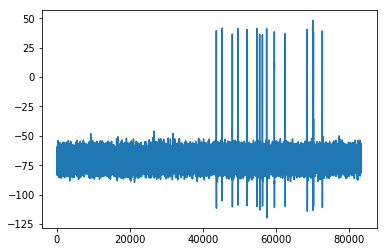

In [56]:
plt.plot(activity)

Ok, so this does indeed look like an electricial activity of a **spiking neuron**, with sharp rises corresponding to some spikes.

Notice that the data looks quite **noisy** so that every spike is not a picture perfect action potential you may have come to expect from textbooks.

Let's take a closer look at a spike by **slicing** the data.

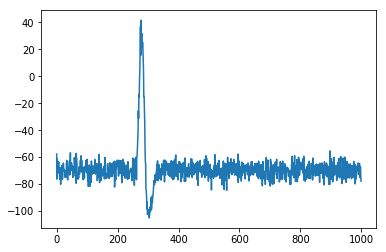

In [57]:
plt.plot(activity[45000:46000])

Notice that we actually don't know what x-axis represents. It's is very likely related to time, but we don't know what each point represents.

Say now you are told that each point represents a value of the neuron's electric activity read out at **32kHz** - that is, 32,000 samples are taken every second! You are now also told that the activity is measured in mV.

Let's prepare a suitable x values. We can convert the sample number into a time value:

In [58]:
sample_number = np.arange(len(activity)) # count up for each sample
sample_time = sample_number / 32000 # convert into time in seconds

Text(0,0.5,'Membrane potential (mV)')

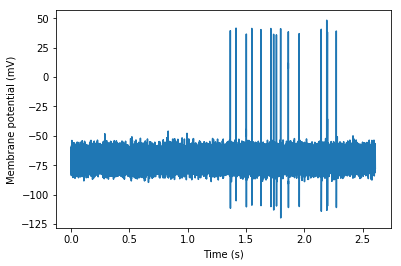

In [59]:
plt.plot(sample_time, activity)
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (mV)')

# Computing statistics on the data

Once you have visualized and have some idea about the data, it's time to start analyzing them! Often, it is a good idea to compute some **statistics** on your data.

### Mean, median, and standard deviation of the electric activity

Let's go ahead and compute mean, median, and standard deviation of the electric activity. All of these are available as either NumPy function or methods on the NumPy array.

In [60]:
np.mean(activity)

-69.81586868351692

In [61]:
np.std(activity)

7.316708408387939

In [62]:
np.median(activity)

-69.9980032932788

With methods:

In [63]:
activity.mean()

-69.81586868351692

In [64]:
activity.std()

7.316708408387939

Also, it can be useful to look at the **distribution** of the data itself. A histogram can give you a sense of variability in your dataset:

Text(0.5,0,'Membrane potential (mV)')

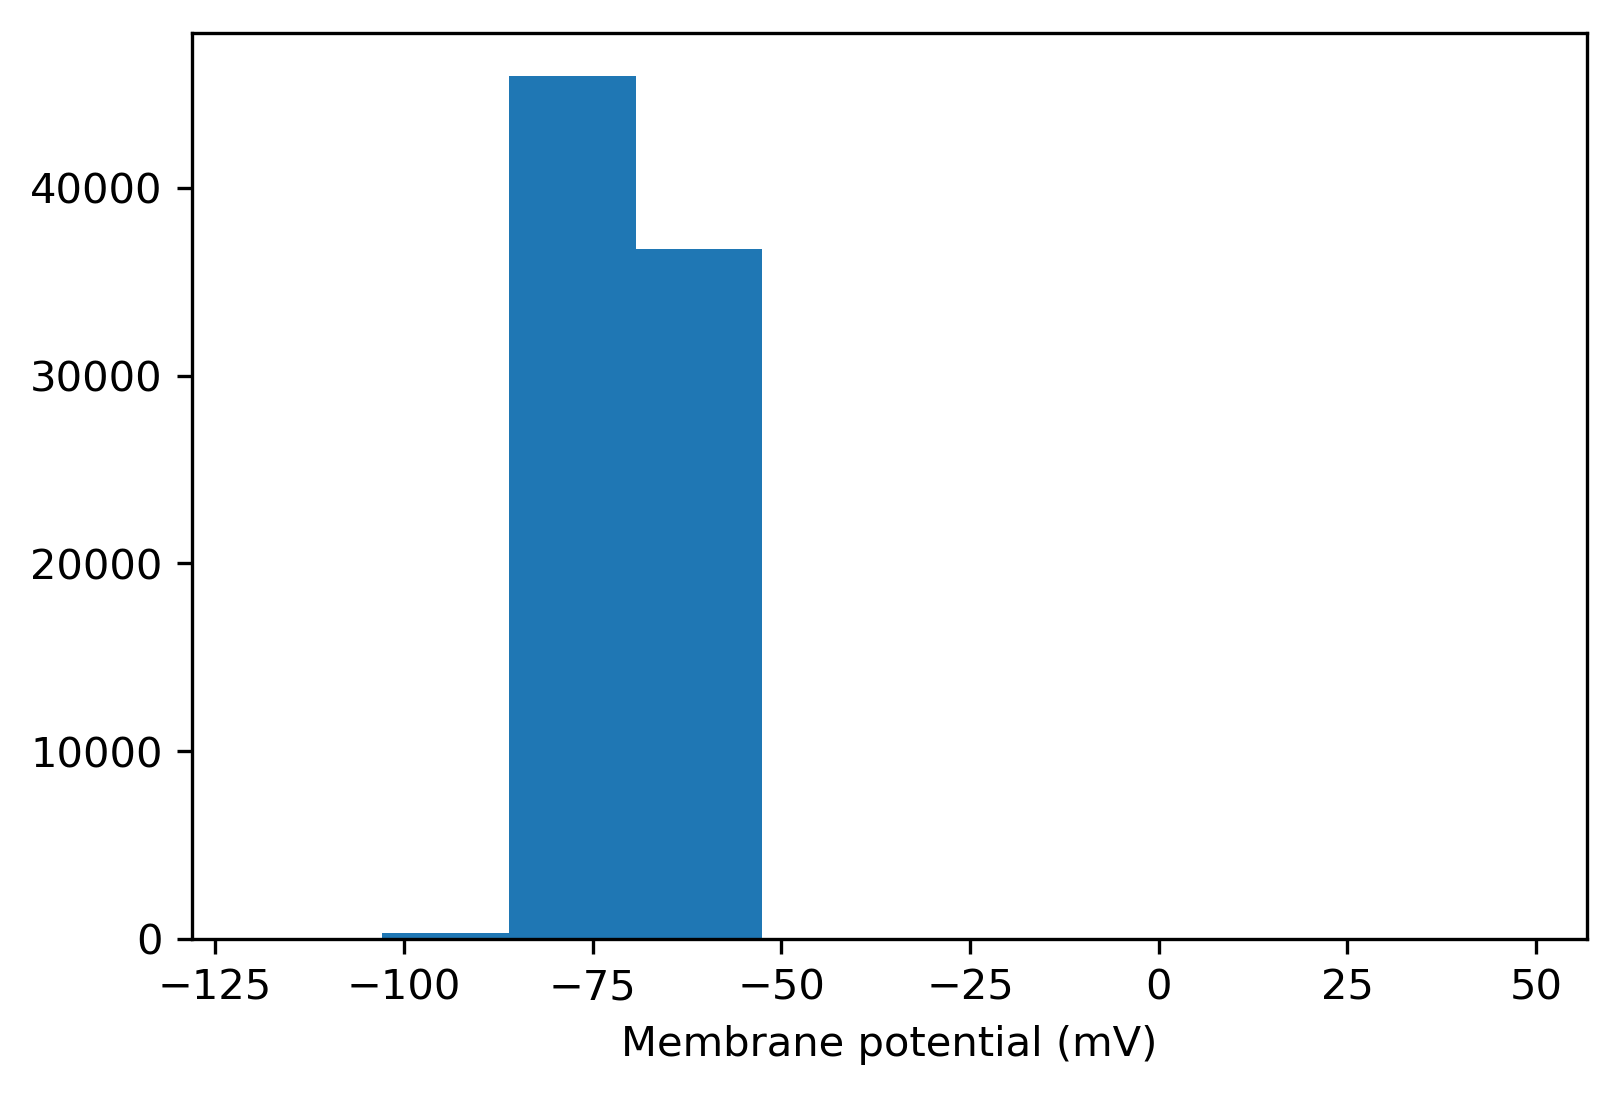

In [65]:
fig = plt.figure(dpi=300)

plt.hist(activity)

plt.xlabel('Membrane potential (mV)')

Default setting on the `hist` plot gives rather crude histogram. You can use **much finer binning** by specifying the number of bins to use.

Text(0.5,0,'Membrane potential (mV)')

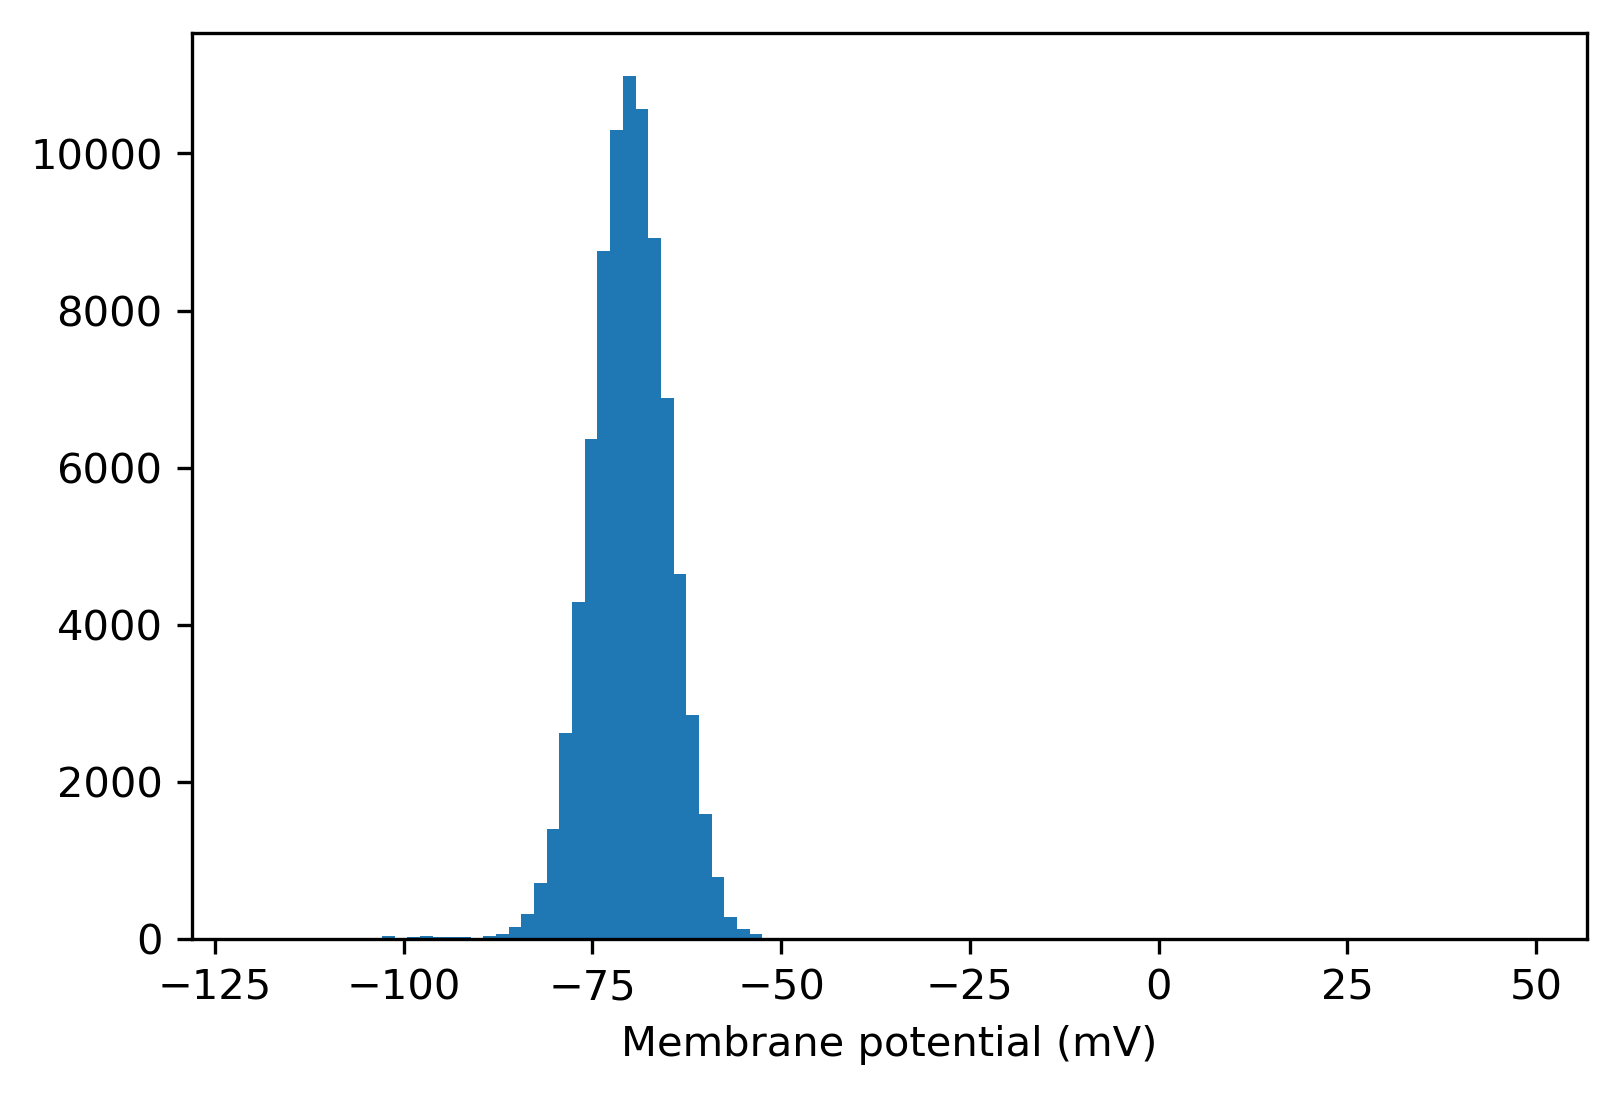

In [66]:
fig = plt.figure(dpi=300)

plt.hist(activity, bins=100) # use more bins to describe the distribution

plt.xlabel('Membrane potential (mV)')

However, if you look at the data, there seems to be two *segments* to the activity - in the first half there is not much activity but there is a lot more in the latter half.

Let's go ahead and split the data into half and analyze them separately:

In [67]:
# compute the index of the half point
half_point = len(activity) // 2

half_point

41727

In [68]:
first_half = activity[:half_point]
second_half = activity[half_point:]

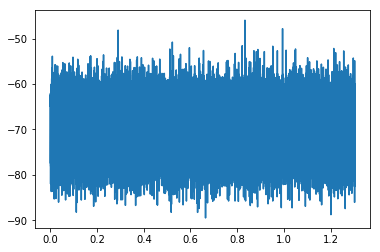

In [69]:
t = np.arange(len(first_half)) / 32000
plt.plot(t, first_half)

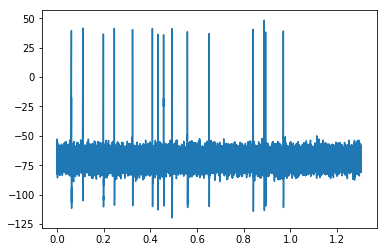

In [70]:
t = np.arange(len(second_half)) / 32000
plt.plot(t, second_half)

Now compute the statistics! Let's write a utility function to compute and print out stats for the data:

In [71]:
def print_stats(data):
    print('Mean:', data.mean())
    print('Std:', data.std())
    print('Median:', np.median(data))

In [72]:
print('For first half')
print_stats(first_half)
print('---------------')
print('For second half')
print_stats(second_half)

For first half
Mean: -69.98973738573712
Std: 4.989284023461964
Median: -69.97128512878112
---------------
For second half
Mean: -69.64200414801219
Std: 9.061696526703304
Median: -70.03418672067127


Looking at the results, we can see that the standard deviation is lower for the first half. We can consider the first half to be the **resting activity** of the neuron, and the standard deviation during this period is often considered the **baseline noise standard deviation**.

# Characterizing neural responses to stimulus

Instead of working with so-called raw electric recordings, let's assume that you work with some measure of neural activity such as **firing rates** or **total spike counts** for each **trial** in an experiment where you present to the animal some **stimulus**.

Let's say that we have performed an experiment where you are recording from a single neuron in the primary visual cortex (V1) of mouse, and on each trial, you present to the mouse a visual stimulus (e.g. an image of a racoon) at **different contrast** to the mouse:

![contrast](images/contrasts.png)

After the experiment, we got a NPY file containing the data about the contrast of the image presented, and the corresponding acitivity of the neuron measured in firing rate in a file called `data/contrast_exp.npy`. Let's go ahead and load it!

In [73]:
data = np.load('data/contrast_exp.npy')

In [74]:
data

array([[ 7.00000000e+01,  0.00000000e+00,  4.00000000e+01,
         6.00000000e+01,  3.00000000e+01,  2.00000000e+01,
         8.00000000e+01,  0.00000000e+00,  2.00000000e+01,
         1.00000000e+02,  3.00000000e+01,  7.00000000e+01,
         5.00000000e+01,  2.00000000e+01,  0.00000000e+00,
         1.00000000e+01,  9.00000000e+01,  6.00000000e+01,
         6.00000000e+01,  4.00000000e+01,  3.00000000e+01,
         6.00000000e+01,  2.00000000e+01,  7.00000000e+01,
         7.00000000e+01,  3.00000000e+01,  8.00000000e+01,
         5.00000000e+01,  4.00000000e+01,  7.00000000e+01,
         0.00000000e+00,  9.00000000e+01,  4.00000000e+01,
         8.00000000e+01,  1.00000000e+01,  3.00000000e+01,
         1.00000000e+02,  9.00000000e+01,  1.00000000e+02,
         0.00000000e+00,  9.00000000e+01,  4.00000000e+01,
         5.00000000e+01,  1.00000000e+01,  6.00000000e+01,
         8.00000000e+01,  1.00000000e+01,  1.00000000e+02,
         1.00000000e+02,  8.00000000e+01,  1.00000000e+0

In [75]:
data.shape

(2, 55)

So it is a 2D array of shape 2 x 55. Let's assume we know that the two rows correspond to the contrast and the neuron's response in firing rates.

Again, the very first thing you should try is **visualization**!

Text(0,0.5,'Firing rate')

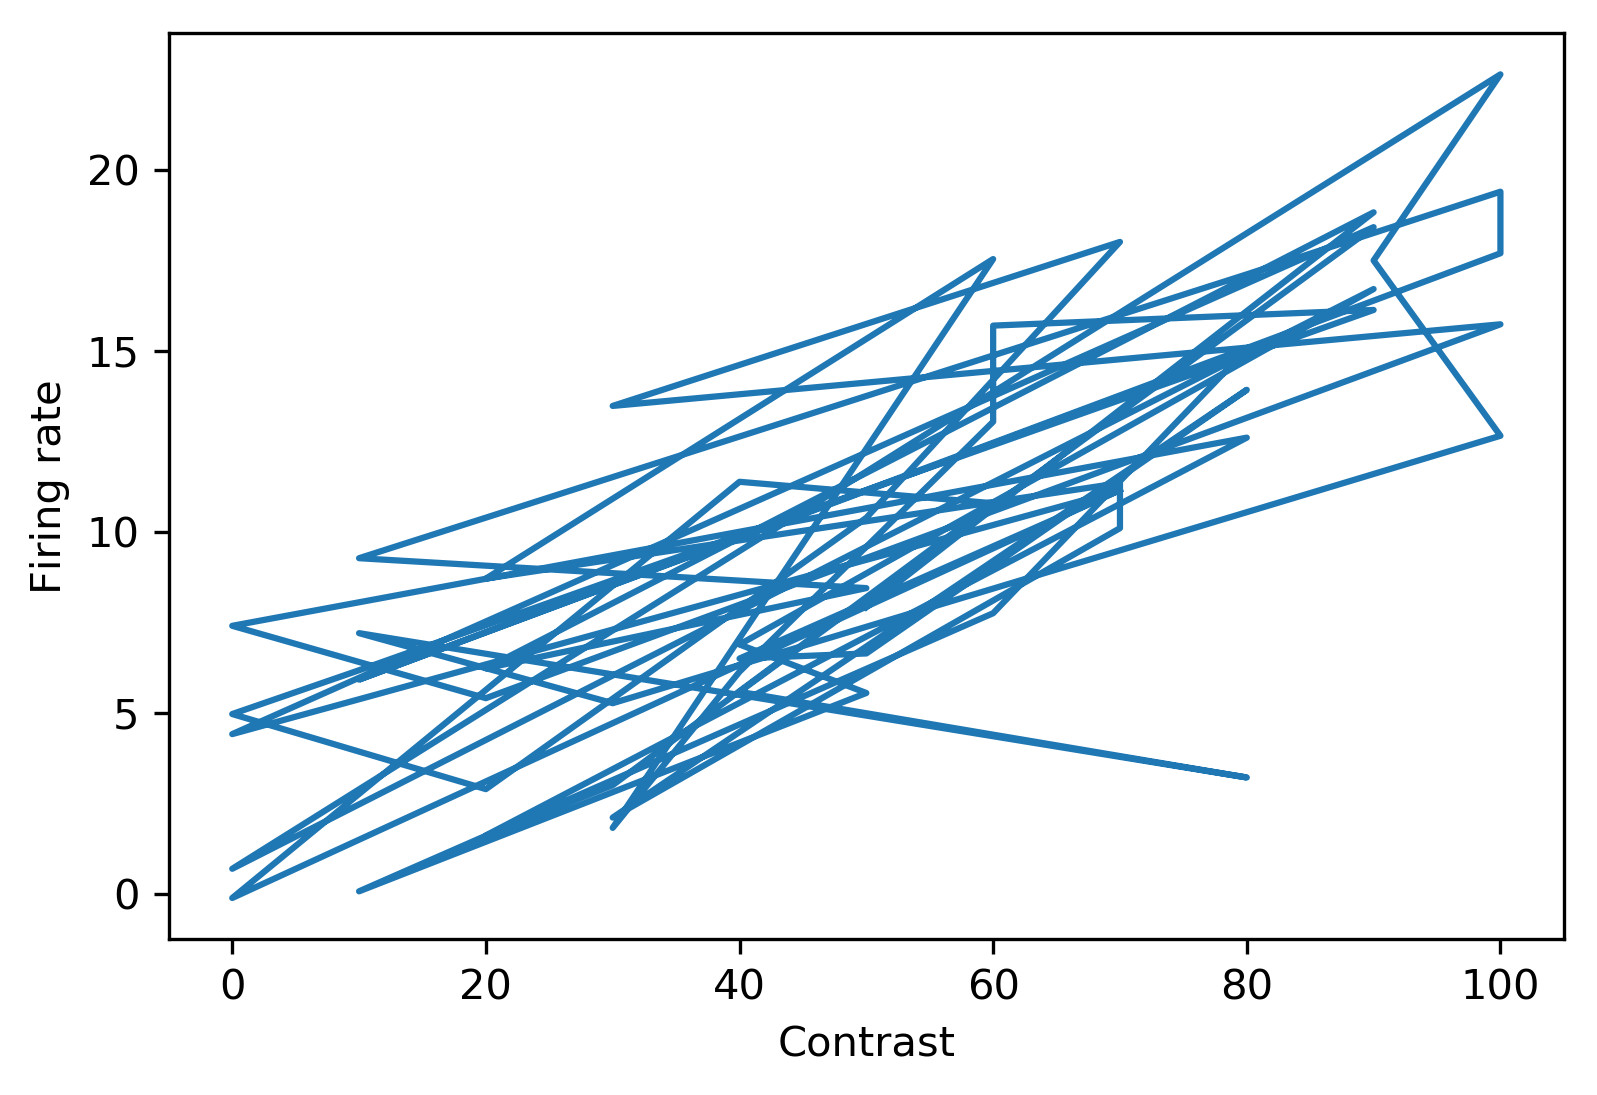

In [76]:
x = data[0]
y = data[1]

fig = plt.figure(dpi=300)
plt.plot(x, y)

plt.xlabel('Contrast')
plt.ylabel('Firing rate')

It looks like a mess because this is a data where data points are organized in any specific sequence! For these kinds of data, `scatter` plot would be a better fit.

Text(0,0.5,'Firing rate')

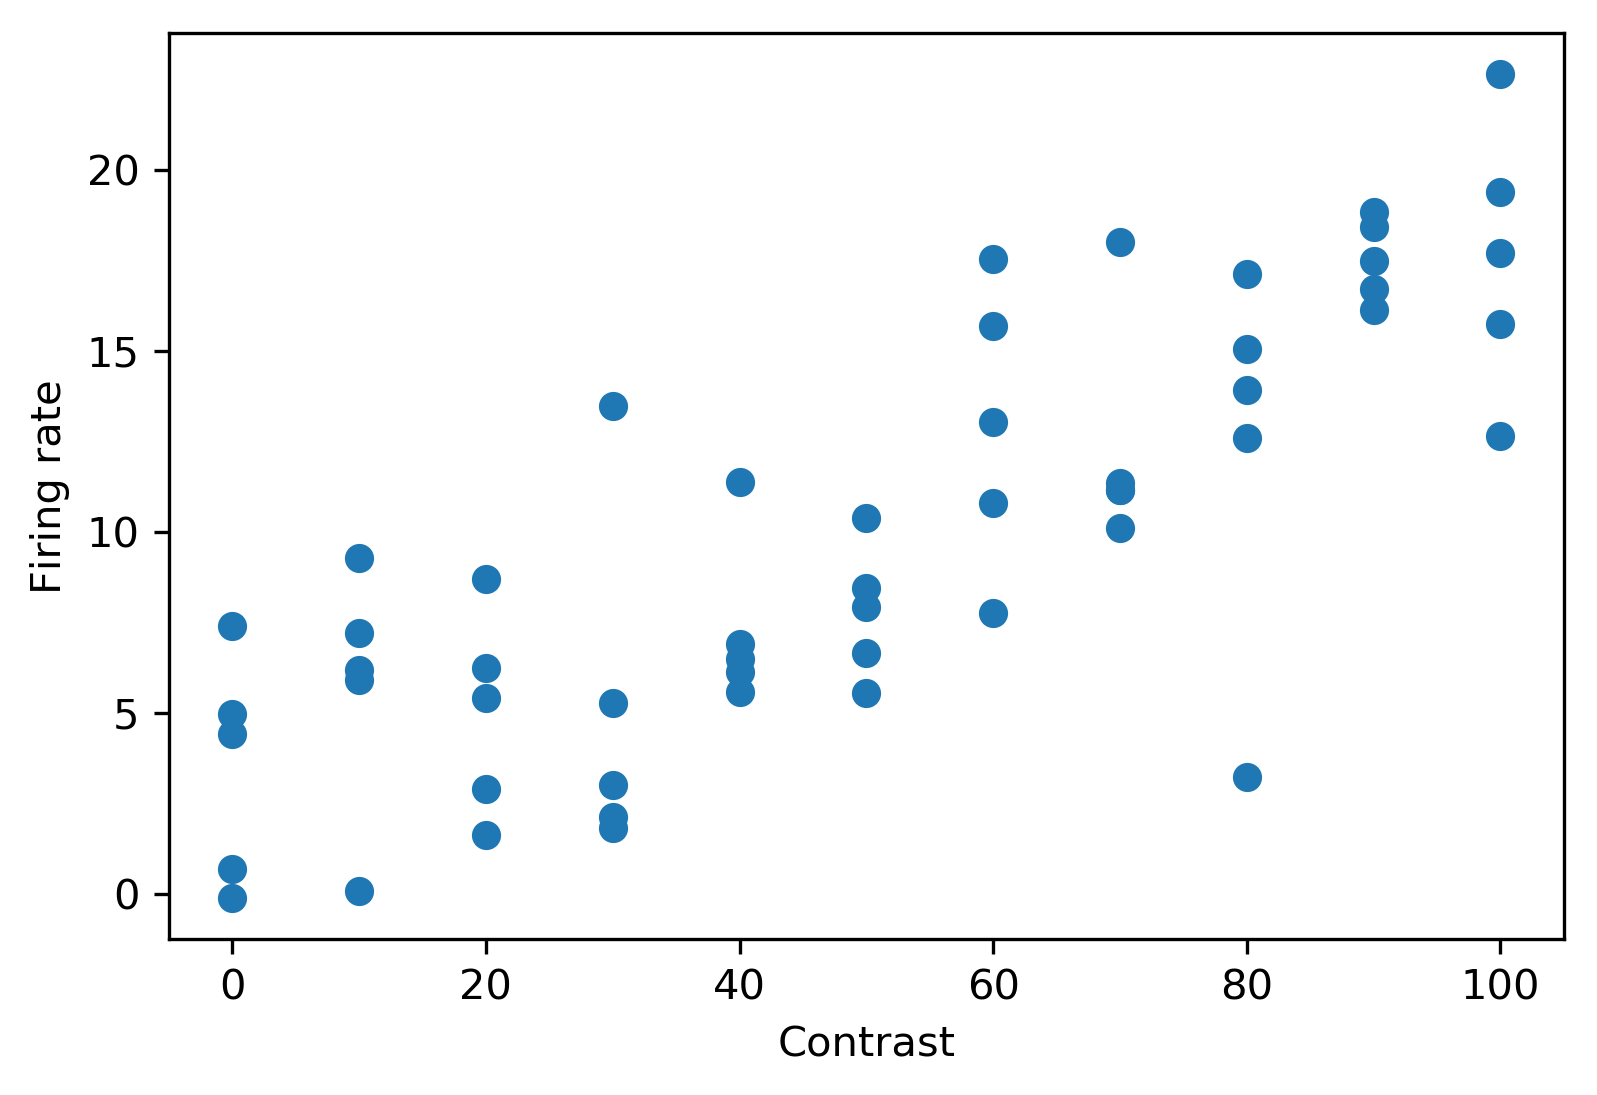

In [77]:
contrasts = data[0]
firing_rates = data[1]

fig = plt.figure(dpi=300)
plt.scatter(contrasts, firing_rates)

plt.xlabel('Contrast')
plt.ylabel('Firing rate')

Much better! Just by looking at the plot, we can tell that the firing rate of the neuron appears to be increase with the contrast of the image. In fact, it almost looks like it follows a straight line!

Whenever you sense that there is a **linear relationship** between two variables - here contrast and neuron's firing rate, it is a good idea to perform **linear regression** on your dataset.

## Linear regression

Linear regression actually falls into a category of analysis called **model fitting** where you try to explain relationships in your data with **a model**. Specfically, in linear regression, you are assuming that **there is some linear relationship** between the two variables, in this case, the contrast and the firing rate. 

In other words, you are assuming that the **underlying model is**:

$ \text{firing rate} = \text{slope} * \text{contrast} + \text{intercept}$

For some value of slope and intercept!

However, if you think about it, this is not possible, because the contrast and firing rate **doesn't seem to be following a perfect line**!

You can get around this issue by assuming that **your data is noisy**! That is, for every measurement you make in firing rate, there is some noise that you cannot control!

$ \text{firing rate} = \text{slope} * \text{contrast} + \text{intercept} + \text{noise}$

Under the standard linear regression, you assume that your noise has a **normal distribution** that is, if you were to plot the histogram of noise, it should look something like:

![noise distribution](images/normal.png)

Here I will show you two ways of performing linear regression. First through the use of `scipy` package's function `linregress`. Second, we will look at how to perform linear regression entirely ourselves mathematically!

### SciPy package

Thus far we have talked about two major scientific packages in Python: NumPy and Matplotlib. Now I'm introducing you another one called SciPy, standing for Scientific Python.

Unlike NumPy and Matplotlib that had more or less specific purpose (numerical array and plotting, respectively), SciPy is really a large collection of various packages each geared towards different aspects of scientific computations. Here we are going to take a look at one of its **subpackage** called `stats`, which is about **statistical analysis and tests**. Because SciPy is such a big package, you typically do not import the package itself, but rather import specific subpackage and its content that you want to use.

You can get a sense of what comes with SciPy by visiting [their website](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)!

Here let's go ahead and import the `stats` subpackage.

In [78]:
import scipy.stats as stats

Go ahead and take some time to admire the number of functions and properties inside this package.

Now, let's take a look at the function we are ultimately interested in: `linregress` and look at its documentation.

In [80]:
stats.linregress?

Signature: stats.linregress(x, y=None)
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.
    If only x is given (and y=None), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension.

Returns
-------
slope : float
    slope of the regression line
intercept : float
    intercept of the regression line
rvalue : float
    correlation coefficient
pvalue : float
    two-sided p-value for a hypothesis test whose null hypothesis is
    that the slope is zero, using Wald Test with t-distribution of
    the test statistic.
stderr : float
    Standard error of the estimated gradient.

See also
--------
:func:`scipy.optimize.curve_fit` : Use non-linear
 least squares to fit a function to data.
:func:`scipy.optimize.leastsq` : Mini

It gives quite descriptive documentation complete with a usage example. Let's now use this function to fit a linear model to our data!

In [81]:
slope, intercept, r_value, p_value, std_err = stats.linregress(contrasts, firing_rates)

And that's it! Let's now take a look at our result:

In [82]:
slope

0.1456395652174445

In [83]:
intercept

2.466700226908074

In [84]:
r_value, p_value, std_err

(0.8039898228660991, 1.458373593464606e-13, 0.014796099383114015)

Now that we have values for the slope and intercept, let's use our model to compute the **expected value of firing rate** for each contrast, and plot them!

In [ ]:
# some values of contrasts to make prediction for
x = np.linspace(0, 100, 100)

# predicted firing rates
y = x * slope + intercept

plt.plot(x, y)

In itself, this is not too interesting - obviously we want to compare this model **against** the real data!

In [ ]:
# some values of contrasts to make prediction for
x = np.linspace(0, 100, 100)

# predicted firing rates
y = x * slope + intercept

plt.plot(x, y)

# plot the actual data on top
plt.scatter(contrasts, firing_rates, color='orange')

That looks like a reasonable fit! Not, let's actually compute the expected firing rate for each value of contrast found in the experiment:

In [ ]:
expected_firing_rates = contrasts * slope + intercept

and compute the **difference** between the expected values and the actually observed values of the firing rates!

In [ ]:
difference = firing_rates - expected_firing_rates

Finally we want to take a look at the **distribution of the deviations, or noise**!

In [ ]:
plt.hist(difference, bins=10)
plt.xlabel('Difference in firing rates')

Although not perfect, the difference appears to be reasonably normally distributed.

### Doing linear regression on your own

While you can use implementation of linear regression as provided by packages like SciPy, you can actually compute and perform linear regression on your own! This does involve some math involving vectors and matrices. I'm including the steps strictly for the interested individuals:

For linear regression with intercept, this is the same as solving the expression:

$$
Y = Xw
$$

where $X$ is an $n \times 2$ matrix containing all x data as first column and a vector of 1s in the second column, and $Y$ is $n \times 1$ vector containing y data. $w$ is a element 2 vector whose first element is the slope and the second is the intercept of linear regression. In such case, the solution can be shown to be:

$$
w = (X^\top X)^{-1}X^\top Y
$$

Let's get started in computation:

In [ ]:
x = contrasts # for easier manipulation
y = firing_rates

We first prepare $X$. Recall that it's first column is the x data and the second column is filled with 1. To get this, we construct a vector of ones and **stack** the two vectors into a matrix.

In [ ]:
ones = np.ones(x.shape) # prepare a vector of ones with same length as x

X = np.stack([x, ones], axis=1) # stack x and vector of ones to get X

In [ ]:
X

In [ ]:
X.shape

Next, we prepare $Y$ by adding an extra dimension to `y`, making it a column vector.

In [ ]:
Y =  y[:, np.newaxis]

In [ ]:
Y.shape

Finally, we get to compute $w$. The equation involves **inverting a matrix**. This is a special operation that needs a function which is provided by NumPy under it's `linalg` subpackage.

In [ ]:
from numpy.linalg import inv # import matrix inversion function used to take inverse of a matrix

Let's now go ahead and compute $w$!

In [ ]:
w = inv(X.T @ X) @ X.T @ Y

Looking at `w`

In [ ]:
w

This is the same exact value provided by `scipy.stats.linregress` function!

# Advanced Topics

Below I step into more advanced analysis for those of you interested.

# Processing data for further analysis

Now that we have visualized the data and computed some statistics, we have pretty good sense of how the data looks. Often times, you would want to **process** your data further before you perform additional analysis. For example, when working with neuronal electricial activity, you'd be interested in **detecting spikes** and extract **when the spike occurred**.

Here, let's load the data again.

In [ ]:
activity = np.load('data/neural_trace.npy')

## Spike detection

### Developing spike detection algorithms

Before we set out, let me state that **spike detection** is a very in-depth topic, with a lot of research involved in how to **extract spikes** from neuronal recordings of electric activity. Given this, what we are about to implement is just about the simplest spike detection algorithm out there.

However, it serves very well for the purpose of illustration on how in principle spike detection would work, and more importantly, how to use Python in achieving non-trivial computations!

With that out of the way, let's continue!

## Basic idea behind spike detection

Let's look again at a single spike trace in the data.

In [ ]:
sample_number = np.arange(len(activity)) # count up for each sample
t = sample_number / 32000 # convert into time in seconds

In [ ]:
segment = np.logical_and(t > 1.36, t < 1.38)

plt.plot(t[segment], activity[segment])

plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (mV)')

When a spike (an action potential) occurs, the membrane potential (the electric activity) quickly rises. Perhaps we can try to detect when the potential goes above certain **threshold**. To develop an algorithm, let's go ahead and focus on this particular segment of activity.

In [ ]:
ts = t[segment]
potential = activity[segment]

plt.plot(ts, potential)

We can try to detect when the potential is above a certain value.

In [ ]:
threshold = -40

above_thr = potential > threshold

This gives back an array of `True`'s and `False`'s. It turns out that, you can convert a boolean array into float, and when you do so, it will convert `True`'s into `1`'s and `False`'s into `0`'s. You can convert types of array with `.astype` method.

In [ ]:
plt.plot(ts, above_thr.astype(float))

In fact, if you straight up plot a boolean array, `plot` will do this conversion for you:

In [ ]:
plt.plot(ts, above_thr)

Now, it would be nice to see this side by side with the membrane potential. Let's try plotting them on the same axes.

In [ ]:
plt.plot(ts, potential)
plt.plot(ts, above_thr)

Plotting them on the same axes doesn't quite give good visibility due to scaling difference. Let's use *subplots*:

In [ ]:
threshold = -40

above_thr = potential > threshold

fig = plt.figure(dpi=300)
plt.subplot(2, 1, 1)
plt.plot(ts, potential)
plt.axhline(threshold, color='orange')

plt.subplot(2, 1, 2)
plt.plot(ts, above_thr)

Ok, that looks like a good start. We now would like to know **when did the potential go above the threshold**.

### Working with toy example

Let's think on how to do this with a much simpler data. Some like below:

In [ ]:
sample = np.array([0, 0, 0, 1, 1, 1, 0, 0])

In the above, we know that it **goes above threshold on index 3** and comes back down on **index 7**. The question is, how can we detect this without manually looking at it?

You could imagine writing a for-loop that finds when the value went from 0 to 1:

In [ ]:
last_value = 0
for i, v in enumerate(sample):
    if last_value == 0 and v == 1:
        print('Changed at index {}!'.format(i))
    last_value = v

However, it is often better to try to avoid for-loops: if something can be done all withint NumPy, it is often significantly faster.

Here, it would be nice if we can figure out the change in value from one index to another. Well, it turns out that you can use `np.diff`!

In [ ]:
delta = np.diff(sample) # gives adjacent value difference

delta

Nice! Now we can see that whereever it changed from 0 to 1 has difference of 1. In fact, we can also detect whereever it changed from 1 to 0 as difference is -1!

In [ ]:
np.where(delta == 1) # find out where difference was 1

Funnily enough, we are told that the index is at 2, not like 3 that we expected. This is because `np.diff` caused the result to shrink by 1 in size! To get around this, we can **pad** `delta` with a 0 at the beginning:

In [ ]:
padded_delta = np.pad(delta, (1, 0), mode='constant', constant_values=0)

padded_delta

Now, the value 1 occurs at the exact index where value went from 0 to 1.

In [ ]:
np.where(padded_delta == 1)

### Applying back to real data

Now we know how to solve the problem of **when did the potential go above the threshold** on a toy example, let's apply it back to the real problem.

Recall that we had `above_thr` that contained `True`'s and `False`'s for where the potential was above the threshold. Let's use the fact that you can treat the array of boolean as array of 0s and 1s, and just apply the algorithm we developed!

In [ ]:
delta = np.diff(above_thr.astype(float)) # find out changes in values
padded_delta = np.pad(delta, (1, 0), mode='constant', constant_values=0)

np.where(padded_delta == 1)

In [ ]:
threshold = -40

above_thr = potential > threshold

delta = np.diff(above_thr.astype(float)) # find out changes in values
padded_delta = np.pad(delta, (1, 0), mode='constant', constant_values=0)

spike_pos = padded_delta == 1
spike_time = ts[spike_pos]

fig = plt.figure(dpi=300)
plt.subplot(2, 1, 1)
plt.plot(ts, potential)
plt.axhline(threshold, color='orange')
# draw vertical line at detected spike position
plt.axvline(spike_time, linestyle='--', color='red')

plt.subplot(2, 1, 2)
plt.plot(ts, above_thr)

### Applying the algorithm to the entire dataset

Now that we have developed the algorithm on a small dataset, it's time to apply it to the original dataset!

In [ ]:
threshold = -40

above_thr = activity > threshold

delta = np.diff(above_thr.astype(float)) # find out changes in values
padded_delta = np.pad(delta, (1, 0), mode='constant', constant_values=0)

spike_pos = padded_delta == 1
spike_times = t[spike_pos] # this will be multiple values

fig = plt.figure(dpi=300)

plt.subplot(3, 1, 1)
plt.plot(t, activity)
plt.axhline(threshold, color='orange')

plt.subplot(3, 1, 2)
plt.plot(t, above_thr)


plt.subplot(3, 1, 3)
plt.plot(t, activity)
for spike_time in spike_times:
    plt.axvline(spike_time, linestyle='--', color='red')